In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
import warnings 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy import sparse
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Hp/Downloads/student_placement_data_updated.csv")
df

,Logical quotient rating,hackathons,coding skills rating,public speaking points,certifications,workshops,Interested subjects,interested career area,Type of company want to settle in?,Management or Technical,worked in teams ever?,Introvert,Suggested Job Role
0,4,0,4,8,shell programming,cloud computing,cloud computing,system developer,Web Services,Management,yes,no,Database Developer
1,7,1,2,3,machine learning,database security,networks,Business process analyst,SAaS services,Technical,no,yes,Portal Administrator
2,1,4,1,3,app development,web technologies,hacking,developer,Sales and Marketing,Management,no,yes,Portal Administrator
3,1,1,2,5,python,data science,networks,testing,Testing and Maintainance Services,Management,yes,yes,Systems Security Administrator
4,5,4,6,3,app development,cloud computing,Computer Architecture,testing,product development,Management,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,6,1,8,app development,cloud computing,Software Engineering,system developer,Testing and Maintainance Services,Management,yes,no,Technical Engineer
19996,8,0,9,8,full stack,game development,Management,Business process analyst,Product based,Management,no,yes,E-Commerce Analyst
19997,3,6,2,3,information security,database security,networks,cloud computing,SAaS services,Technical,no,yes,Business Intelligence Analyst
19998,1,4,9,5,full stack,cloud computing,IOT,testing,Cloud Services,Management,yes,no,Software Quality Assurance (QA) / Testing


In [3]:
df.columns

Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'certifications', 'workshops',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?', 'Management or Technical',
       'worked in teams ever?', 'Introvert', 'Suggested Job Role'],
      dtype='object')

In [4]:
df.shape

(20000, 13)

In [5]:
df.describe()

,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.995050,2.992650,5.004750,5.012800
std,2.578383,2.005791,2.576831,2.588875
min,1.000000,0.000000,1.000000,1.000000
25%,3.000000,1.000000,3.000000,3.000000
50%,5.000000,3.000000,5.000000,5.000000
75%,7.000000,5.000000,7.000000,7.000000
max,9.000000,6.000000,9.000000,9.000000


In [6]:
unique_values_of_columns = pd.DataFrame({
    "Column_name" : df.columns,
    "unique_values": [df[col].unique() for col in df.columns]
})

unique_values_of_columns

,Column_name,unique_values
0,Logical quotient rating,"[4, 7, 1, 5, 3, 2, 9, 6, 8]"
1,hackathons,"[0, 1, 4, 3, 2, 6, 5]"
2,coding skills rating,"[4, 2, 1, 6, 8, 3, 5, 9, 7]"
3,public speaking points,"[8, 3, 5, 1, 6, 4, 9, 7, 2]"
4,certifications,"[shell programming, machine learning, app deve..."
5,workshops,"[cloud computing, database security, web techn..."
6,Interested subjects,"[cloud computing, networks, hacking, Computer ..."
7,interested career area,"[system developer, Business process analyst, d..."
8,Type of company want to settle in?,"[Web Services, SAaS services, Sales and Market..."
9,Management or Technical,"[Management, Technical]"


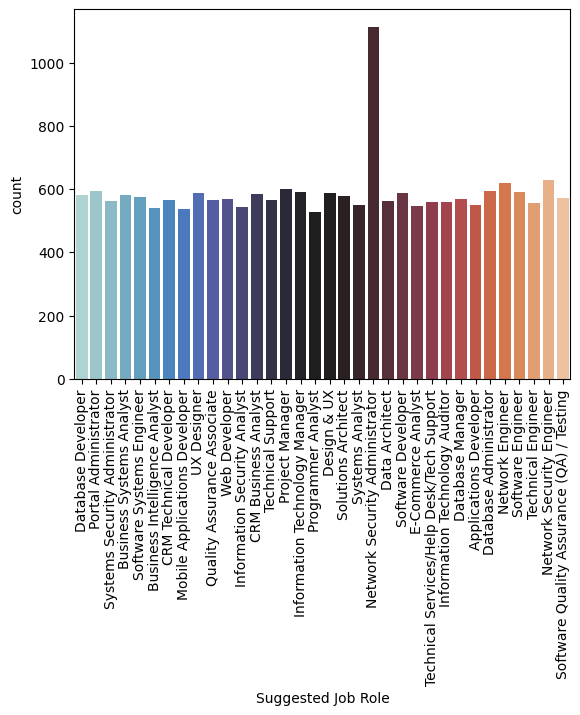

In [7]:
chart = sn.countplot(df, x = "Suggested Job Role", palette= "icefire")
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [8]:
df["Suggested Job Role"].value_counts()

Suggested Job Role
Network Security Administrator               1112
Network Security Engineer                     630
Network Engineer                              621
Project Manager                               602
Database Administrator                        593
Portal Administrator                          593
Information Technology Manager                591
Software Engineer                             590
UX Designer                                   589
Design & UX                                   588
Software Developer                            587
CRM Business Analyst                          584
Business Systems Analyst                      582
Database Developer                            581
Solutions Architect                           578
Software Systems Engineer                     575
Software Quality Assurance (QA) / Testing     571
Database Manager                              570
Web Developer                                 570
CRM Technical Developer        

In [9]:
x = df.iloc[:,:-1]
x

,Logical quotient rating,hackathons,coding skills rating,public speaking points,certifications,workshops,Interested subjects,interested career area,Type of company want to settle in?,Management or Technical,worked in teams ever?,Introvert
0,4,0,4,8,shell programming,cloud computing,cloud computing,system developer,Web Services,Management,yes,no
1,7,1,2,3,machine learning,database security,networks,Business process analyst,SAaS services,Technical,no,yes
2,1,4,1,3,app development,web technologies,hacking,developer,Sales and Marketing,Management,no,yes
3,1,1,2,5,python,data science,networks,testing,Testing and Maintainance Services,Management,yes,yes
4,5,4,6,3,app development,cloud computing,Computer Architecture,testing,product development,Management,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,6,1,8,app development,cloud computing,Software Engineering,system developer,Testing and Maintainance Services,Management,yes,no
19996,8,0,9,8,full stack,game development,Management,Business process analyst,Product based,Management,no,yes
19997,3,6,2,3,information security,database security,networks,cloud computing,SAaS services,Technical,no,yes
19998,1,4,9,5,full stack,cloud computing,IOT,testing,Cloud Services,Management,yes,no


In [10]:
y = df.iloc[:,-1]
y

0                               Database Developer
1                             Portal Administrator
2                             Portal Administrator
3                   Systems Security Administrator
4                         Business Systems Analyst
                           ...                    
19995                           Technical Engineer
19996                           E-Commerce Analyst
19997                Business Intelligence Analyst
19998    Software Quality Assurance (QA) / Testing
19999                       Applications Developer
Name: Suggested Job Role, Length: 20000, dtype: object

In [11]:
y.unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

In [12]:
x_ohe = OneHotEncoder().fit_transform(x)

In [13]:
x_ohe.shape

(20000, 83)

In [14]:
x_standarad_scaler = StandardScaler(with_mean=False)

In [15]:
x_standarad_scaler = x_standarad_scaler.fit_transform(x_ohe)

**Clubbing the Classification Labels**  
Now transforming data as shown under:

- 'Solutions Architect' 'Data Architect' 'Information Technology Auditor' --> others
- 'CRM Business Analyst' 'CRM Technical Developer' 'Project Manager' 'Information Technology Manager' --> Managerial roles/ CRM
- 'Business Systems Analyst' 'Business Intelligence Analyst''E-Commerce Analyst'--> Analyst
- 'Mobile Applications Developer' 'Web Developer''Applications Developer' --> Mobile Applications/ Web Development
- 'Software Quality Assurance (QA) / Testing' 'Quality Assurance Associate' --> QA/Testing
- 'UX Designer' 'Design & UX' --> UX/Design
- 'Database Developer' 'Database Administrator' 'Database Manager' 'Portal Administrator' --> Databases
- 'Programmer Analyst' 'Systems Analyst'--> Programming/ Systems Analyst
- 'Network Security Administrator' 'Network Security Engineer' 'Network Engineer''Systems Security Administrator' 'Software Systems Engineer''Information Security Analyst' --> Networks/ Systems
- 'Software Engineer' 'Software Developer' --> SE/SDE
- 'Technical Engineer' 'Technical Services/Help Desk/Tech Support' 'Technical Support'--> Technical Support/Service

In [16]:
y_trans = y.copy(deep=True)

In [17]:
y_trans = y_trans.replace(['CRM Business Analyst','CRM Technical Developer','Project Manager', 'Information Technology Manager'],'CRM/Managerial Roles')
y_trans = y_trans.replace(['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst'],'Analyst')
y_trans = y_trans.replace(['Mobile Applications Developer','Web Developer', 'Applications Developer'],'Mobile Applications/ Web Development')
y_trans = y_trans.replace(['Software Quality Assurance (QA) / Testing','Quality Assurance Associate'],'QA/Testing')
y_trans = y_trans.replace(['UX Designer','Design & UX'] , 'UX/Design')
y_trans = y_trans.replace(['Database Developer','Database Administrator', 'Database Manager','Portal Administrator'] , 'Databases')
y_trans = y_trans.replace(['Programmer Analyst','Systems Analyst'],'Programming/ Systems Analyst')
y_trans = y_trans.replace(['Network Security Administrator','Network Security Engineer', 'Network Engineer','Systems Security Administrator', 'Software Systems Engineer','Information Security Analyst'],'Networks/ Systems')
y_trans = y_trans.replace(['Software Engineer','Software Developer'] ,'SE/SDE')
y_trans = y_trans.replace(['Technical Engineer','Technical Services/Help Desk/Tech Support', 'Technical Support'],'Technical Support/Service')
y_trans = y_trans.replace(['Solutions Architect','Data Architect','Information Technology Auditor'],'others')

In [18]:
y_trans

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

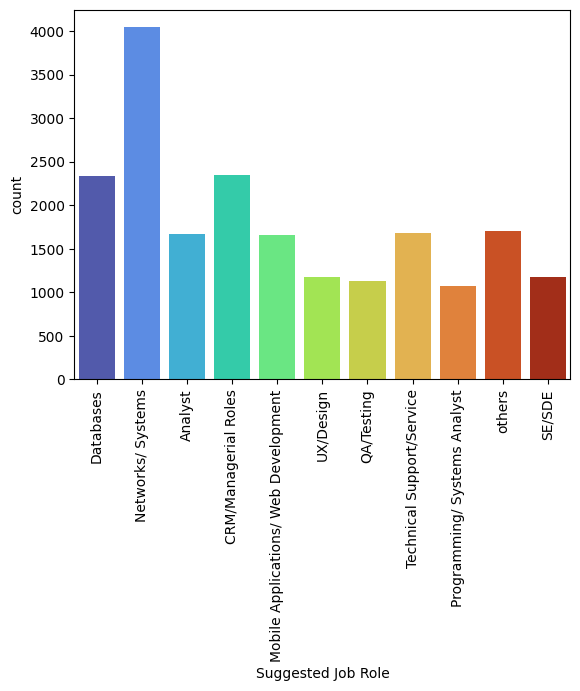

In [19]:
chart = sn.countplot(x=y_trans, palette= "turbo")
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

As data has imbalanced suggested job roles, so we have to do oversmapling to make it a balance and to reduce noice.

In [20]:
x_oversampling = sparse.csr_matrix.copy(x_standarad_scaler)
y_oversampling = y_trans.copy(deep=True)

In [21]:
ros = RandomOverSampler(random_state= 42)
x_overs, y_overs = ros.fit_resample(x_oversampling, y_oversampling)

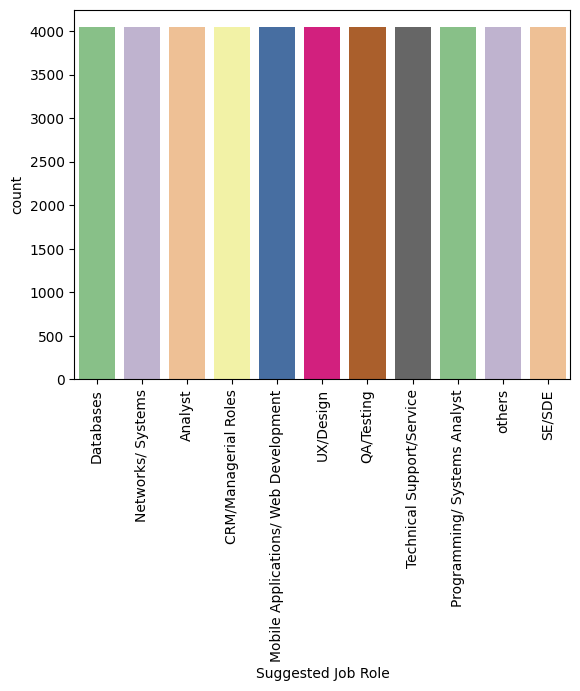

In [22]:
chart = sn.countplot(x=y_overs, palette= "Accent")
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [23]:
x_overs.shape

(44473, 83)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_overs,y_overs,test_size=0.2)

In [25]:
clf = MLPClassifier(activation='relu', hidden_layer_sizes = (64,128,256,512, 64), solver = 'adam')
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))
print("Testing Accuracy Score: ",accuracy_score(clf.predict(X_test),y_test))

Training Accuracy Score:  1.0
Testing Accuracy Score:  0.7976391231028668


In [26]:
cm_train = confusion_matrix(clf.predict(X_train),y_train)
cm_test = confusion_matrix(clf.predict(X_test),y_test)

In [27]:
print("Train classwise accuracies")
print(cm_train.diagonal()/cm_train.sum(axis=1))
print("Test classwise accuracies")
print(cm_test.diagonal()/cm_test.sum(axis=1))

Train classwise accuracies
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test classwise accuracies
[0.82629108 0.71542553 0.67336011 0.82147477 0.40674603 0.86515642
 0.87360179 0.86085973 0.84029484 0.87542088 0.81913652]


In [28]:
CRM_Managerial_Roles = ['CRM Business Analyst','CRM Technical Developer','Project Manager','Information Technology Manager']
Analyst = ['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst']
Mobile_Applications_Web_Development = ['Mobile Applications Developer','Web Developer','Applications Developer']
QA_Testing = ['Software Quality Assurance (QA) / Testing','Quality Assurance Associate']
UX_Design = ['UX Designer','Design & UX']
Databases = ['Database Developer','Database Administrator','Database Manager','Portal Administrator']
Programming_Systems_Analyst = ['Programmer Analyst','Systems Analyst']
Networks_Systems = ['Network Security Administrator','Network Security Engineer','Network Engineer', 'Systems Security Administrator','Software Systems Engineer','Information Security Analyst']
SE_SDE = ['Software Engineer','Software Developer']
Technical_Support_Service = ['Technical Engineer','Technical Services/Help Desk/Tech Support','Technical Support']
others = ['Solutions Architect','Data Architect','Information Technology Auditor']

In [29]:
new_data = OneHotEncoder().fit_transform(x)
new_data = StandardScaler(with_mean=False).fit_transform(new_data)
new_data = sparse.csr_matrix.copy(new_data)
output=clf.predict(new_data[467])
output

array(['SE/SDE'], dtype='<U36')

In [30]:
if output[0] == 'CRM/Managerial Roles':
    cat=CRM_Managerial_Roles
elif output[0] == 'Analyst':
    cat=Analyst
elif output[0] == 'Mobile Applications/ Web Development':
    cat=Mobile_Applications_Web_Development
elif output[0] == 'QA/Testing':
    cat=QA_Testing
elif output[0] == 'UX/Design':
    cat=UX_Design
elif output[0] == 'Databases':
    cat=Databases
elif output[0] == 'Programming/ Systems Analyst':
    cat=Programming_Systems_Analyst
elif output[0] == 'Networks/ Systems':
    cat=Networks_Systems
elif output[0] == 'SE/SDE':
    cat=SE_SDE
elif output[0] == 'Technical Support/Service':
    cat=Technical_Support_Service
else:
    cat=others

In [31]:
print(f"Suggested job role catogory is: '{output[0]}'\n")
print("possible job roles in the suggested category are:")
for i in cat:
    print(i)

Suggested job role catogory is: 'SE/SDE'

possible job roles in the suggested category are:
Software Engineer
Software Developer


In [32]:
file = open("MLPclassifier_model.pkl","wb")
pickle.dump(clf,file)
file.close()